C:\Users\Administrator\AppData\Local\Temp\ipykernel_29180\905112103.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data['Price'] = data['Price'].apply(pd.to_numeric, errors='ignore')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29180\905112103.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Price.interpolate(inplace=True)


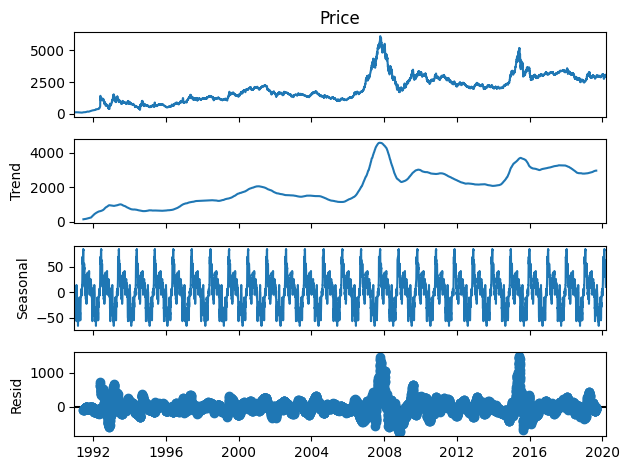

In [2]:
# 使用tsa对沪市指数进行分析：trend, seasonal, residual
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# 数据加载
data = pd.read_csv('shanghai_index_1990_12_19_to_2020_03_12.csv', usecols=['Timestamp', 'Price'])
data.Timestamp = pd.to_datetime(data.Timestamp)
data = data.set_index('Timestamp')
data['Price'] = data['Price'].apply(pd.to_numeric, errors='ignore')
# 进行线性插补缺漏值
data.Price.interpolate(inplace=True)
#  返回三个部分 trend（趋势），seasonal（季节性）和residual (残留)
result = sm.tsa.seasonal_decompose(data.Price, period=250)
result.plot()
plt.show()

In [5]:
#help(sm.tsa.seasonal_decompose)